<h2>Customer Segmentation</h2>

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# libaries to help with data visualization
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Library to split data
from sklearn.model_selection import train_test_split
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
from copy import deepcopy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy import stats
from scipy.stats import chi2_contingency
import phik
# Models
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)

#Metrics
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    auc,
    roc_curve,
    f1_score,
    accuracy_score,
    classification_report,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
#SMOTE over_sampling
from imblearn.over_sampling import SMOTE

#segmentation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

from collections import Counter


#tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.utils import class_weight

In [7]:
df = pd.read_csv("BankChurners_unknown.csv")

In [8]:
def replaceEncoder(df):
    df['Gender'].replace('M',1,inplace = True)
    df['Gender'].replace('F',0,inplace = True)

    df['Education_Level'].replace('Unknown',0,inplace = True)
    df['Education_Level'].replace('Uneducated',1,inplace = True)
    df['Education_Level'].replace('High School',2,inplace = True)
    df['Education_Level'].replace('College',3,inplace = True)
    df['Education_Level'].replace('Graduate',4,inplace = True)
    df['Education_Level'].replace('Post-Graduate',5,inplace = True)
    df['Education_Level'].replace('Doctorate',6,inplace = True)

    df['Marital_Status'].replace('Unknown',0,inplace = True)
    df['Marital_Status'].replace('Single',1,inplace = True)
    df['Marital_Status'].replace('Married',2,inplace = True)
    df['Marital_Status'].replace('Divorced',3,inplace = True)

    df['Card_Category'].replace('Blue',0,inplace = True)
    df['Card_Category'].replace('Gold',1,inplace = True)
    df['Card_Category'].replace('Silver',2,inplace = True)
    df['Card_Category'].replace('Platinum',3,inplace = True)


    df['Income_Category'].replace('Unknown',0,inplace = True)
    df['Income_Category'].replace('Less than $40K',1,inplace = True)
    df['Income_Category'].replace('$40K - $60K',2,inplace = True)
    df['Income_Category'].replace('$60K - $80K',3,inplace = True)
    df['Income_Category'].replace('$80K - $120K',4,inplace = True)
    df['Income_Category'].replace('$120K +',5,inplace = True)

    df['Attrition_Flag'].replace('Existing Customer',0,inplace = True)
    df['Attrition_Flag'].replace('Attrited Customer',1,inplace = True)
    
    return df

In [12]:
categorical_cols = [    
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]

In [10]:
df3 = pd.DataFrame()
#df3[categorical_cols] = df[categorical_cols]

df3 = replaceEncoder(df)
df3

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,1,3,2,2,3,0,39,...,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,0,49,0,5,4,1,1,0,44,...,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,0,51,1,3,4,2,4,0,36,...,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,0,40,0,4,2,0,1,0,34,...,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,0,40,1,3,1,2,3,0,21,...,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,1,2,4,1,2,0,40,...,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,1,41,1,2,0,3,2,0,25,...,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,1,44,0,1,2,2,1,0,36,...,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,1,30,1,2,4,0,2,0,36,...,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000


In [13]:
df_class = pd.DataFrame()

df_class[categorical_cols] = df3[categorical_cols]
df_class

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,1,2,2,3,0
1,0,4,1,1,0
2,1,4,2,4,0
3,0,2,0,1,0
4,1,1,2,3,0
...,...,...,...,...,...
10122,1,4,1,2,0
10123,1,0,3,2,0
10124,0,2,2,1,0
10125,1,4,0,2,0


In [17]:
score = []
inertia = []

for n_clusters in range(2,30):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
    kmeans.fit(df_class)
    inertia.append(kmeans.inertia_)
    score.append(silhouette_score(df_class, kmeans.labels_,sample_size=128, metric='euclidean'))

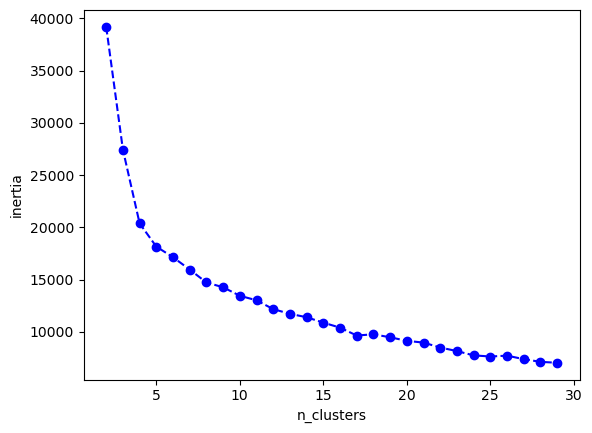

In [18]:
n_clusters = range(2, 30)
plt.plot(n_clusters, inertia, "bo--")
plt.xlabel("n_clusters")
plt.ylabel("inertia")
plt.show()

In [19]:
k = 4

kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(df_class)
print(kmeans.labels_)

[2 1 0 ... 3 1 1]


In [20]:
labels = pd.DataFrame(kmeans.labels_,columns=["label"])
centers = pd.DataFrame(kmeans.cluster_centers_,columns=df_class.columns)
labels_count = pd.DataFrame(labels.value_counts(),columns=["count"]).sort_index()
labels_count = labels_count.reset_index()
final = pd.concat([labels_count,centers],axis=1)
final["class_label"] = ["class_1","class_2","class_3","class_4"]
final

,label,count,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,class_label
0,0,1822,1.000,4.064,1.552,3.808,0.195,class_1
1,1,3286,0.172,4.088,1.546,1.110,0.103,class_2
2,2,1842,1.000,1.116,1.535,3.823,0.156,class_3
3,3,3177,0.170,1.088,1.519,1.100,0.096,class_4


In [21]:
df3['label']= kmeans.labels_


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,label
0,768805383,0,45,1,3,2,2,3,0,39,...,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061,2
1,818770008,0,49,0,5,4,1,1,0,44,...,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105,1
2,713982108,0,51,1,3,4,2,4,0,36,...,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000,0
3,769911858,0,40,0,4,2,0,1,0,34,...,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760,3
4,709106358,0,40,1,3,1,2,3,0,21,...,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,1,2,4,1,2,0,40,...,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462,1
10123,710638233,1,41,1,2,0,3,2,0,25,...,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511,3
10124,716506083,1,44,0,1,2,2,1,0,36,...,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000,3
10125,717406983,1,30,1,2,4,0,2,0,36,...,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000,1


In [22]:
df3=df3.drop(categorical_cols,axis=1)  

In [24]:
df3

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,label
0,768805383,0,45,3,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061,2
1,818770008,0,49,5,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105,1
2,713982108,0,51,3,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000,0
3,769911858,0,40,4,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760,3
4,709106358,0,40,3,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,2,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462,1
10123,710638233,1,41,2,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511,3
10124,716506083,1,44,1,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000,3
10125,717406983,1,30,2,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000,1


In [25]:
final

,label,count,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,class_label
0,0,1822,1.000,4.064,1.552,3.808,0.195,class_1
1,1,3286,0.172,4.088,1.546,1.110,0.103,class_2
2,2,1842,1.000,1.116,1.535,3.823,0.156,class_3
3,3,3177,0.170,1.088,1.519,1.100,0.096,class_4


In [34]:
df_data = pd.merge(df3, final, how="left", on='label')

In [35]:
df_data

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,label,count,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,class_label
0,768805383,0,45,3,39,5,1,3,12691.000,777,...,1.625,0.061,2,1842,1.000,1.116,1.535,3.823,0.156,class_3
1,818770008,0,49,5,44,6,1,2,8256.000,864,...,3.714,0.105,1,3286,0.172,4.088,1.546,1.110,0.103,class_2
2,713982108,0,51,3,36,4,1,0,3418.000,0,...,2.333,0.000,0,1822,1.000,4.064,1.552,3.808,0.195,class_1
3,769911858,0,40,4,34,3,4,1,3313.000,2517,...,2.333,0.760,3,3177,0.170,1.088,1.519,1.100,0.096,class_4
4,709106358,0,40,3,21,5,1,0,4716.000,0,...,2.500,0.000,2,1842,1.000,1.116,1.535,3.823,0.156,class_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,2,40,3,2,3,4003.000,1851,...,0.857,0.462,1,3286,0.172,4.088,1.546,1.110,0.103,class_2
10123,710638233,1,41,2,25,4,2,3,4277.000,2186,...,0.683,0.511,3,3177,0.170,1.088,1.519,1.100,0.096,class_4
10124,716506083,1,44,1,36,5,3,4,5409.000,0,...,0.818,0.000,3,3177,0.170,1.088,1.519,1.100,0.096,class_4
10125,717406983,1,30,2,36,4,3,3,5281.000,0,...,0.722,0.000,1,3286,0.172,4.088,1.546,1.110,0.103,class_2


In [36]:
df_data = df_data.drop(['CLIENTNUM','count','class_label'],axis=1)  

In [38]:


df_data.to_csv("BankChurners_unknown_segment_data.csv", index=False)

In [39]:
df_data

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,label,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,0,45,3,39,5,1,3,12691.000,777,11914.000,...,1144,42,1.625,0.061,2,1.000,1.116,1.535,3.823,0.156
1,0,49,5,44,6,1,2,8256.000,864,7392.000,...,1291,33,3.714,0.105,1,0.172,4.088,1.546,1.110,0.103
2,0,51,3,36,4,1,0,3418.000,0,3418.000,...,1887,20,2.333,0.000,0,1.000,4.064,1.552,3.808,0.195
3,0,40,4,34,3,4,1,3313.000,2517,796.000,...,1171,20,2.333,0.760,3,0.170,1.088,1.519,1.100,0.096
4,0,40,3,21,5,1,0,4716.000,0,4716.000,...,816,28,2.500,0.000,2,1.000,1.116,1.535,3.823,0.156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,2,40,3,2,3,4003.000,1851,2152.000,...,15476,117,0.857,0.462,1,0.172,4.088,1.546,1.110,0.103
10123,1,41,2,25,4,2,3,4277.000,2186,2091.000,...,8764,69,0.683,0.511,3,0.170,1.088,1.519,1.100,0.096
10124,1,44,1,36,5,3,4,5409.000,0,5409.000,...,10291,60,0.818,0.000,3,0.170,1.088,1.519,1.100,0.096
10125,1,30,2,36,4,3,3,5281.000,0,5281.000,...,8395,62,0.722,0.000,1,0.172,4.088,1.546,1.110,0.103


In [41]:
X = df_data.drop(columns="Attrition_Flag")

y = df_data["Attrition_Flag"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)


Training Performance:

LogisticRegression:
               precision    recall  f1-score   support

           0       0.96      0.81      0.88      6793
           1       0.46      0.83      0.59      1308

    accuracy                           0.82      8101
   macro avg       0.71      0.82      0.74      8101
weighted avg       0.88      0.82      0.84      8101

DecisionTree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      1308

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101

Bagging:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      6793
           1       1.00      0.97      0.98      1308

    accuracy                           0.99      8101
   macro avg       1.00      0.98      0.99      8101
weig

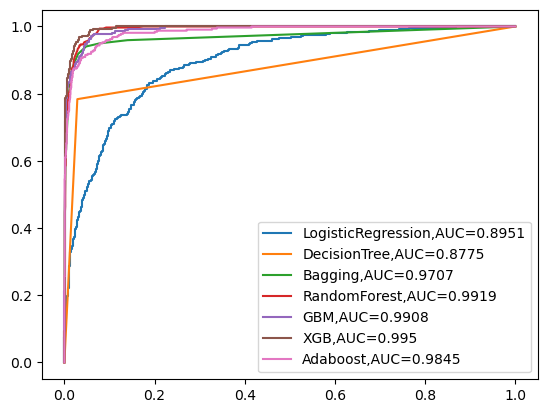

In [43]:
models = []  # Empty list to store all the models

# Appending models into the list with default parameters and random_state=1
models.append(("LogisticRegression", LogisticRegression(random_state=1234,class_weight='balanced')))
models.append(("DecisionTree", DecisionTreeClassifier(random_state=1234,class_weight='balanced')))
models.append(("Bagging", BaggingClassifier(random_state=1234)))
models.append(("RandomForest", RandomForestClassifier(random_state=1234,class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1234)))
models.append(("XGB",  XGBClassifier(random_state=1234)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1234)))


print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = classification_report(y_train, model.predict(X_train)) 
    print("{}:\n {}".format(name, scores))

print('**************************************************')    
print("\n" "Test Performance:(recall     auc)" "\n")
for name, model in models:
    y_pred =model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    scores = classification_report(y_test, y_pred) 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba[:, 1])  
    print("{}: \n{}\n".format(name, scores))
    auc = round(metrics.roc_auc_score(y_test, y_pred_proba[:, 1]),4)
    print("\tAUC:",auc)
    plt.plot(fpr,tpr, label=name +",AUC="+str(auc))
plt.legend()

In [45]:


s = SMOTE(random_state=1234)
X_train_sm, y_train_sm = s.fit_resample(X_train, y_train)




Training Performance:

LogisticRegression:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      6793
           1       0.81      0.81      0.81      6793

    accuracy                           0.81     13586
   macro avg       0.81      0.81      0.81     13586
weighted avg       0.81      0.81      0.81     13586

DecisionTree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6793

    accuracy                           1.00     13586
   macro avg       1.00      1.00      1.00     13586
weighted avg       1.00      1.00      1.00     13586

Bagging:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6793

    accuracy                           1.00     13586
   macro avg       1.00      1.00      1.00     13586
weig

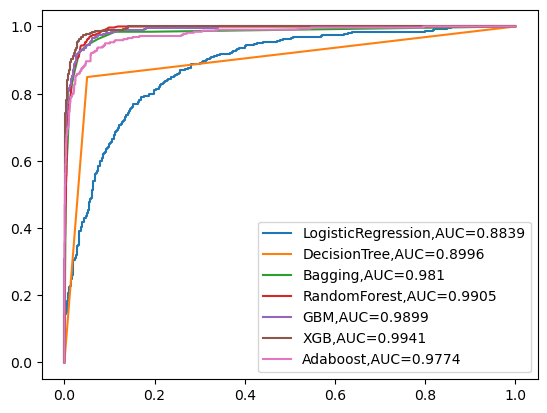

In [46]:
models = []  # Empty list to store all the models

# Appending models into the list with default parameters and random_state=1
models.append(("LogisticRegression", LogisticRegression(random_state=1234)))
models.append(("DecisionTree", DecisionTreeClassifier(random_state=1234)))
models.append(("Bagging", BaggingClassifier(random_state=1234)))
models.append(("RandomForest", RandomForestClassifier(random_state=1234)))
models.append(("GBM", GradientBoostingClassifier(random_state=1234)))
models.append(("XGB",  XGBClassifier(random_state=1234)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1234)))


print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train_sm, y_train_sm)
    scores = classification_report(y_train_sm, model.predict(X_train_sm)) 
    print("{}:\n {}".format(name, scores))

print('**************************************************')    
print("\n" "Test Performance:(recall     auc)" "\n")
for name, model in models:
    y_pred =model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    scores = classification_report(y_test, y_pred) 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba[:, 1])  
    print("{}: \n{}\n".format(name, scores))
    auc = round(metrics.roc_auc_score(y_test, y_pred_proba[:, 1]),4)
    print("\tAUC:",auc)
    plt.plot(fpr,tpr, label=name +",AUC="+str(auc))
plt.legend()

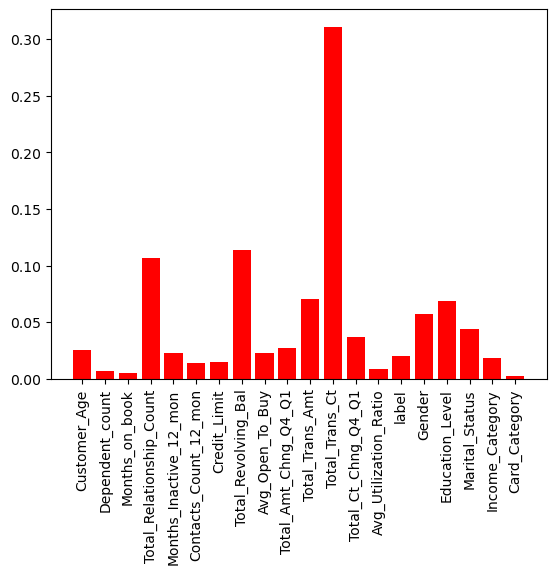

In [58]:
#XGB model

model = models[5][1]

feature_names = X_test.columns
importances = model.feature_importances_
plt.bar(range(len(importances)), importances, color="r", align = "center")
plt.xticks(range(len(importances)), feature_names)
plt.tick_params(axis="x",labelrotation=90)